<a href="https://colab.research.google.com/github/Lenna888/Linear_Model_Iris/blob/main/Linear_Model_Iris_DSMatallana_LELatorre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aplicación de Regresión Lineal para el dataset Iris de Sklearn

El siguiente script presenta el desarrollo de un modelo de Regresión lineal para el dataset Iris de scikit-learn (sklearn).

@authors: Duvan Santiago Matallana Jiménez - Laura Estefania Latorre Pachon
@date: 14/09/2025

Machine Learning - 802
Universidad de Cundinamarca

##**Importación de Librerías**

Para la aplicación del modelo de regresión lineal, se usará el toy dataset de scikit learn denominado **Iris** el cual clasifica 4 especies diferentes de la flor Iris.

**Descripción de las Features**

Este dataset contiene un conjunto de datos de 150 muestras donde para cada una de las especies se tienen los siguientes features (medidas en cm):

1.   Largo del sépalo
2.   Ancho del sépalo
3.   Largo del pétalo
4.   Ancho del pétalo



In [320]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, r2_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

##**División del Conjunto de Datos**

Se divide el conjunto de datos en un conjunto de entrenamiento y otro de testeo. Para este caso la división se realizó de la siguiente forma:

- Entrenamiento: 80%
- Testeo: 20%

Para el control de la aleatoriedad se estableció un número inicial de 42.


In [321]:

def function_split(X, y, rs: int):
  """Split the dataset into two random subsets: training and testing.

    This function uses train_test_split to divide the dataset into training and testing subsets for the linear regression model.
    In this case, the split was done as follows:
    Training: 80%
    Testing: 20%
    To control randomness, an initial random seed of 42 was set.

    Args:
      X: features
      y: target variable
      rs (int): initial random seed for reproducibility

    Returns:
      X_train: training set of features
      X_test: testing set of features
      y_train: training set of target variable
      y_test: testing set of target variable

    """
  X_train, X_test, y_train, y_test= train_test_split(X, y, train_size= 0.8,test_size=0.2,random_state=rs, stratify=y)
  return X_train, X_test, y_train, y_test

##**Normalización de los Datos**

Normalización de datos, garantizando que los datos de entrenamiento y de testeo estén en la misma escala. Esto evita que determinadas características dominen el modelo debido a las diferencias de escala.

In [322]:

def function_standard_scaler(X_train, X_test):
  """Feature normalization (variables on the same scale = improves performance and numerical stability)

  This function normalizes the data in the X_train and X_test datasets (features), transforming each feature so that it has a mean of 0 and a standard deviation of 1.
  This ensures that all features have the same importance in the regression model.

  Args:
    X_train: training set of features
    X_test: testing set of features

  Returns:
    X_train_scaled: training set of normalized features
    X_test_scaled: testing set of normalized features

  """

  scaler=StandardScaler()
  X_train_scaled=scaler.fit_transform(X_train)
  X_test_scaled=scaler.transform(X_test)

  return X_train_scaled, X_test_scaled

def function_min_max_scaler(X_train, X_test):
  """Dataset normalization using MinMaxScaler.

  This function normalizes the dataset using the MinMaxScaler, transforming the minimum
  value to 0 and the maximum value to 1. The remaining values are distributed
  proportionally between them.

  Args:
    X_train: training set of features
    X_test: testing set of features

  Returns:
    X_train_scaled: training set of normalized features
    X_test_scaled: testing set of normalized features

  """
  scaler=MinMaxScaler()
  X_train_scaled=scaler.fit_transform(X_train)
  X_test_scaled=scaler.transform(X_test)

  return X_train_scaled, X_test_scaled


##**Entrenamiento del Modelo**

Aplicación del modelo de regresión lineal al conjunto de datos transformados.


In [323]:
def function_fit (X_train_scaled, y_train):
  """Model training with the dataset already normalized (Standard or MinMaxScaler)

    This function trains a linear regression model with the normalized training data.

    Args:
      X_train_scaled: training set of normalized features
      y_train: training set of target variable

    Returns:
      model_iris: linear regression model trained with the normalized training data.

   """
  model_iris=LinearRegression()
  model_iris.fit(X_train_scaled, y_train)

  return model_iris

##**Predicción del Modelo**

Se realiza preddciones  con el conjunto de pruebas para validar la predicción del modelo

In [324]:
def function_predict(model_iris, X_test_scaled):
  """Make predictions on the test set.

    This function uses the trained model to make predictions on the test set.

    Args:
      model_iris: linear regression model trained with the normalized training data
      X_test_scaled: testing set of normalized features

    Returns:
      y_pred_iris: model predictions on the test set
  """
  y_pred_iris= model_iris.predict(X_test_scaled)

  return y_pred_iris

##**Regresión a clasificación**

Debido a que el objetivo del proyecto es poder determinar qué planta será según los features, se debe redondear sus resultados que son números continuos, a valores de 0("setosa"), 1("versicolor"), 2("virginica"). Debe devolver la precisión de la predicción realizada.



In [325]:
def regression_to_class(y_pred_iris):
  """Converts continuous regression predictions to discrete class labels.

  This function takes the continuous output from a linear regression model and
  converts it to discrete class labels (0, 1, or 2) by rounding the predictions
  to the nearest integer and clipping them to the valid range.

  Args:
    y_pred_iris: A NumPy array of continuous predictions from the regression model.

  Returns:
    A NumPy array of integer class labels (0, 1, or 2).
  """
  y_pred_iris_class = np.rint(y_pred_iris).astype(int)
  y_pred_iris_class = np.clip(y_pred_iris_class, 0, 2)
  return  y_pred_iris_class

##**Representación del Modelo**


In [326]:
def plot_confusion_matrix(cm, class_names, title):
    """Display a confusion matrix using a heatmap."""
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Prediction')
    plt.ylabel('Real Value')
    plt.title(title)
    plt.show()

In [327]:
def function_show_graphics(y_test, y_pred_iris, y_pred_iris_class, test:int, scaler:str, target_names, plt_type):
  """Graphically represent the relationship between actual and predicted values of the model.

    This function displays, through a scatter plot and a residual plot, the actual and
    predicted values of the model. In addition, it generates a residual plot
    (Residual = ActualValue - PredictedValue) to evaluate the model’s accuracy.

    Args:
      y_test: actual values from the test set
      y_pred_iris: model predictions on the test set

  """
  if plt_type == 'Before':
    try:
      #Scatter plot
      fig, axes = plt.subplots(1, 2, figsize=(16, 7))
      sns.regplot(x=y_test, y=y_pred_iris, ci=95, scatter_kws={'alpha':0.4, 'color': 'purple'}, ax=axes[0])
      axes[0].set_title('Actual Values vs. Predicted Values', fontsize=14)
      axes[0].set_xlabel("Actual Values")
      axes[0].set_ylabel("Predicted Values")


      #Residue graph
      sns.residplot(x=y_pred_iris, y=y_test, lowess=True, ax=axes[1], scatter_kws={'color': 'orange'})
      axes[1].set_title('Residuals Plot', fontsize=14)
      axes[1].set_xlabel("Predicted Values")
      axes[1].set_ylabel("Residuals (Errors)")

      fig.suptitle('Linear Regression Analysis in the Iris Dataset', fontsize=18)

      # Adjust the layout so that titles do not overlap
      plt.tight_layout(rect=[0, 0.03, 1, 0.95])

      # Display the graphics
      plt.show()
    except Exception as e:
      print(f"Error showing before class...: {e}")
  elif plt_type == 'After':
    try:
      cm = confusion_matrix(y_test, y_pred_iris_class)
      plot_confusion_matrix(cm, target_names, f"Confusion Matrix for test {test} using {scaler}")
    except Exception as e:
      print(f"Error showing after class...: {e}")


##**Evaluación del Modelo**

Se usa métricas de evaluación que miden la diferencia entre los valores predichos por el modelo y los valores reales.

- Error Absoluto Medio
- Error Cuadrático Medio
- Coeficiente de Determinación


In [328]:
def function_metrics(X, y, scaler, random_state, iris_class_names, test)->None:
  """Calculate evaluation metrics for the performance of the linear regression model applied to the Iris dataset.
    The Mean Squared Error, Mean Absolute Error, and the Coefficient of Determination are calculated.

    Args:
      y_test: actual values from the test set
      y_pred_iris: model predictions on the test set

    Returns:
      None
  """
  #Division of the dataset
  X_train, X_test, y_train, y_test=function_split(X, y, random_state)

  # Standard normalization of the dataset
  if scaler == 'Standard':
    X_train_scaled, X_test_scaled = function_standard_scaler(X_train, X_test)
  elif scaler == 'MinMax':
    X_train_scaled, X_test_scaled = function_min_max_scaler(X_train, X_test)

  # Model training with normalized data
  model_iris=function_fit(X_train_scaled, y_train)

  # Model prediction
  y_pred_iris=function_predict(model_iris, X_test_scaled)
  y_pred_iris_class=regression_to_class(y_pred_iris)

  try:
    # Model evaluation
    print(f"===== Before classification in test {test} =====\n")
    iris_mse=mean_squared_error(y_test, y_pred_iris)
    iris_mae=mean_absolute_error(y_test, y_pred_iris)
    iris_r2=r2_score(y_test, y_pred_iris)
    print(f"\n\nMean Absolute Error: {iris_mae} \n\nMean Square Error: {iris_mse} \n\nRsquared: {iris_r2}")
    function_show_graphics(y_test, y_pred_iris, y_pred_iris_class, test, scaler, iris_class_names, 'Before')

  except Exception as e:
    print(f"Error calculating metrics before class...: {e}")

  try:
    print(f"\n===== After classification in test {test} =====\n")
    iris_mse_class=mean_squared_error(y_test, y_pred_iris_class)
    iris_mae_class=mean_absolute_error(y_test, y_pred_iris_class)
    iris_r2_class=r2_score(y_test, y_pred_iris_class)
    iris_f1_class=f1_score(y_test, y_pred_iris_class, average='weighted')
    iris_conf_matrix_class=confusion_matrix(y_test, y_pred_iris_class)
    print(f"\n\nMean Absolute Error: {iris_mae_class} \n\nMean Square Error: {iris_mse_class} \n\nRsquared: {iris_r2_class}" )
    print(f"\n\nConfusion Matrix:\n {iris_conf_matrix_class}")
    print(f"\n\nClassification Report:\n {classification_report(y_test, y_pred_iris_class, target_names=iris_class_names)}")
    function_show_graphics(y_test, y_pred_iris, y_pred_iris_class, test, scaler, iris_class_names, 'After')

  except Exception as e:
    print(f"Error calculating metrics after class...: {e}")

##**Realizar k-fold-cross-validation**
Este se usa para poder estudiar la precisión real del modelo, pues la respuesta de una regresión lineal es un número continuo, y debe ser una clase para determinar cual planta es.

Al realizarse un entrenamiento normal, la precisión puede llegar a ser exacta, pero no demuestra la capacidad real del modelo, sino la capacidad bajo los valores determinados por el entrenamiento.

In [329]:
def evualuate_with_cross_validation(X, y, model, scaler, iris_target_names):
  """
  Evaluate the performance of a model using k-fold cross-validation.
  """
  try:
    if scaler == 'Standard':
      X_scaled = StandardScaler().fit_transform(X)
    elif scaler == 'MinMax':
      X_scaled = MinMaxScaler().fit_transform(X)

    scores = cross_val_predict(model, X_scaled, y, cv=5)
    scores_class = regression_to_class(scores)
    ac_score = accuracy_score(y, scores_class)
    cm = confusion_matrix(y, scores_class)
    report = classification_report(y, scores_class, target_names=iris_target_names)

    print(f"==== Model evaluation using K-fold-cross-validation using {scaler} ====\n")
    print(f"Accuracy: {ac_score:.2%}\n")
    print(f"Confusion matrix:\n{cm}\n")
    print(f"Classification report:\n{report}\n")
    plot_confusion_matrix(cm, iris_target_names, "Confusion Matrix")
    print("\n\n")
  except Exception as e:
    print(f"Error during k-fold-cross-validation...: {e}")

##**Descripción de las Variables Objetivo**

Las especies para este conjunto de datos son:
1. Iris Setosa
2. Iris Versicolour
3. Iris Virginica

In [330]:
def main():
  """Main function to execute the linear regression model for the Iris dataset.
  """
  # load the dataset into variable ds_iris
  ds_iris = load_iris()
  print(f"Target variables dataset:\n {ds_iris.target}\n\nTarget variable names: {ds_iris.target_names} \n\nFeature names: {ds_iris.feature_names}\n")

  # Creation of features X and target variable Y
  X = pd.DataFrame(ds_iris.data, columns=ds_iris.feature_names)
  y = ds_iris.target
  names = ds_iris.target_names

  # First analysis with k-fold cross-validation
  evualuate_with_cross_validation(X, y, LinearRegression(), 'Standard', names)
  evualuate_with_cross_validation(X, y, LinearRegression(), 'MinMax', names)

  # Tests with 80/20 training and different parameters
  print("==== Test using train split 80/20 ====")

  # Test 1
  function_metrics(X, y, 'Standard', 42, names, 1)
  function_metrics(X, y, 'MinMax', 42, names, 1)

  # Test 2
  function_metrics(X, y, 'Standard', 53, names, 2)
  function_metrics(X, y, 'MinMax', 53, names, 2)

  # Test 3
  function_metrics(X, y, 'Standard', 9722, names, 3)
  function_metrics(X, y, 'MinMax', 9722, names, 3)

  # Test 4
  function_metrics(X, y, 'Standard', 17, names, 4)
  function_metrics(X, y, 'MinMax', 17, names, 4)


Target variables dataset:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

Target variable names: ['setosa' 'versicolor' 'virginica'] 

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

==== Model evaluation using K-fold-cross-validation using Standard ====

Accuracy: 92.67%

Confusion matrix:
[[50  0  0]
 [ 0 46  4]
 [ 0  7 43]]

Classification report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.87      0.92      0.89        50
   virginica       0.91      0.86      0.89        50

    accuracy                           0.93       150
   macro avg       0.93      0.93      0.93       150
weighted a

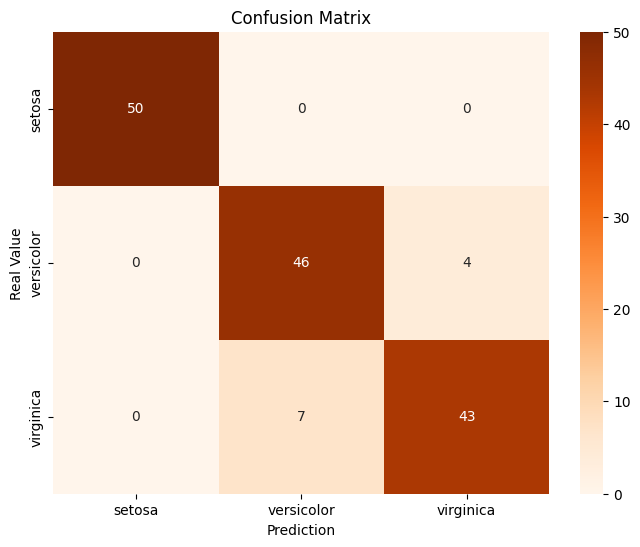




==== Model evaluation using K-fold-cross-validation using MinMax ====

Accuracy: 92.67%

Confusion matrix:
[[50  0  0]
 [ 0 46  4]
 [ 0  7 43]]

Classification report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.87      0.92      0.89        50
   virginica       0.91      0.86      0.89        50

    accuracy                           0.93       150
   macro avg       0.93      0.93      0.93       150
weighted avg       0.93      0.93      0.93       150




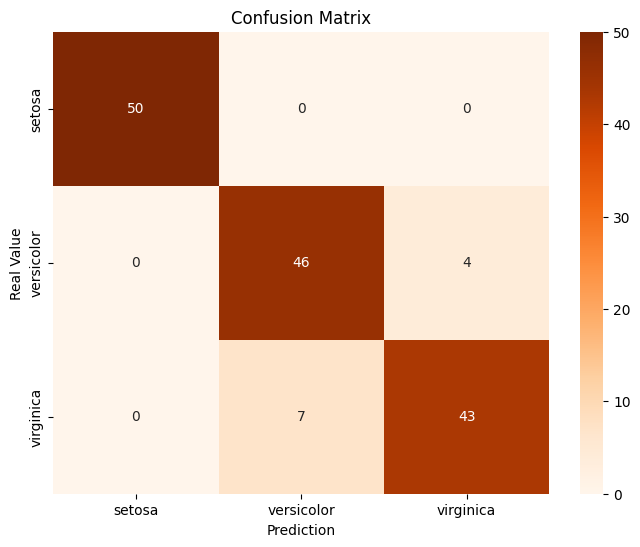




==== Test using train split 80/20 ====
===== Before classification in test 1 =====



Mean Absolute Error: 0.18660179917934386 

Mean Square Error: 0.05734568562614573 

Rsquared: 0.9139814715607814


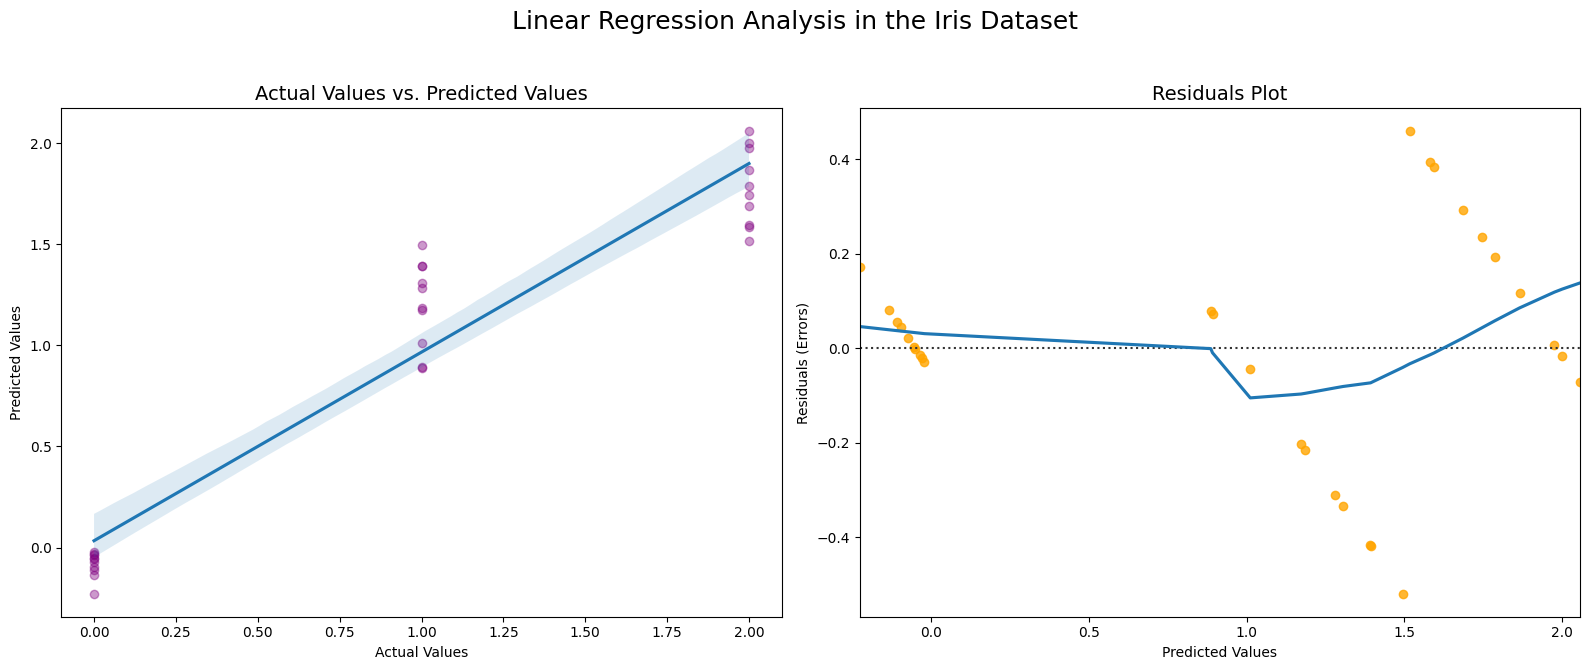


===== After classification in test 1 =====



Mean Absolute Error: 0.0 

Mean Square Error: 0.0 

Rsquared: 1.0


Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



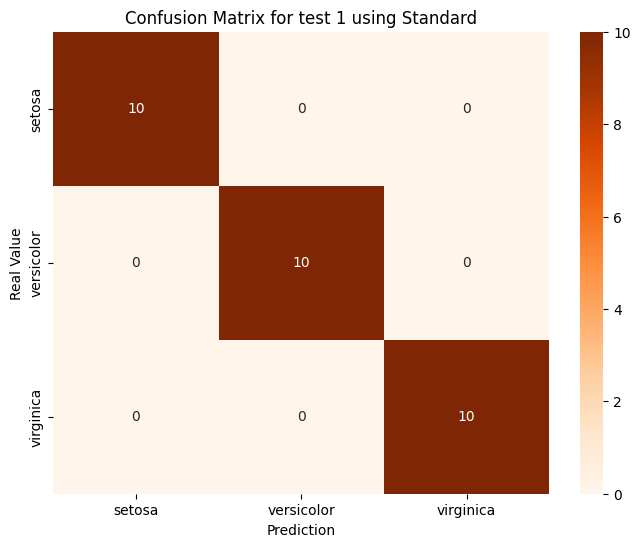

===== Before classification in test 1 =====



Mean Absolute Error: 0.1866017991793441 

Mean Square Error: 0.05734568562614575 

Rsquared: 0.9139814715607814


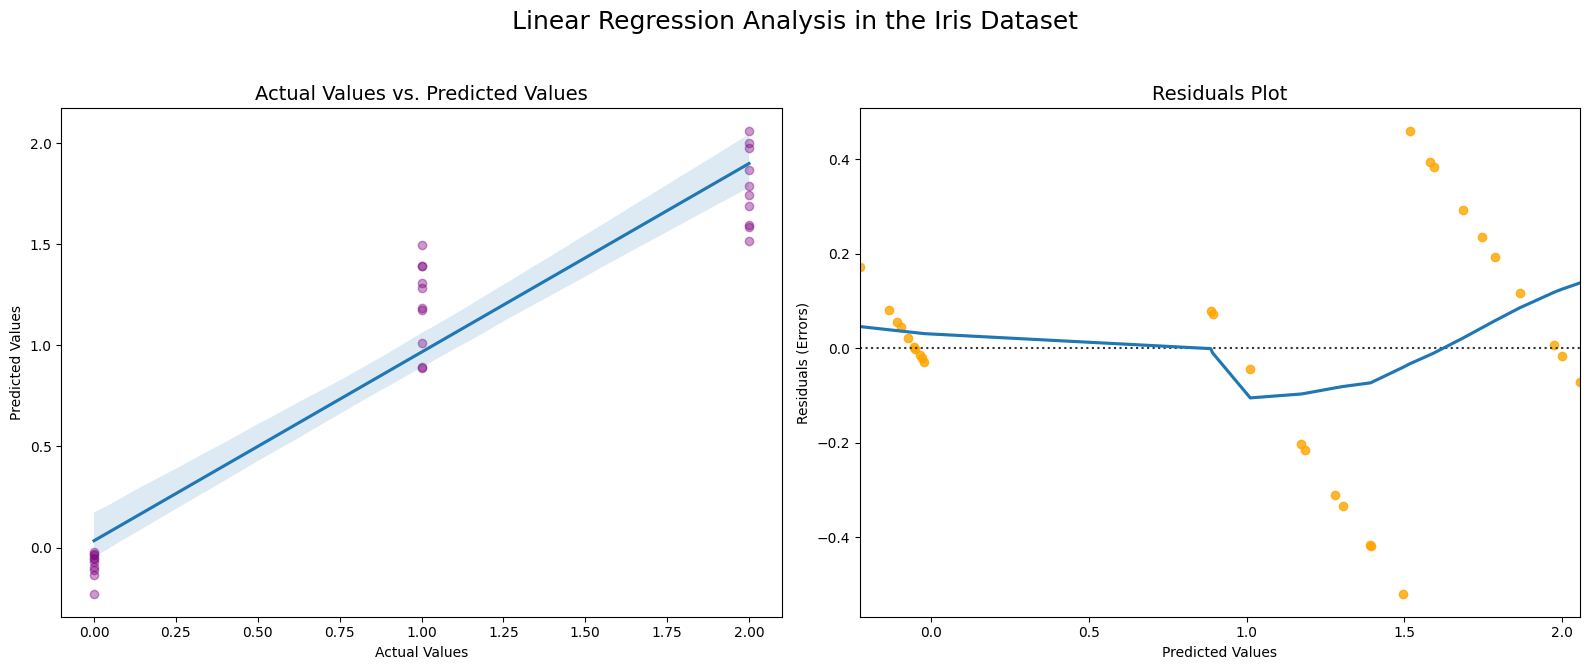


===== After classification in test 1 =====



Mean Absolute Error: 0.0 

Mean Square Error: 0.0 

Rsquared: 1.0


Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



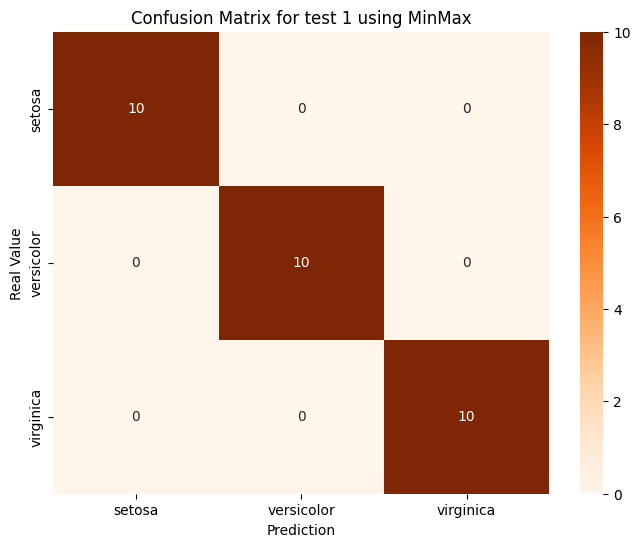

===== Before classification in test 2 =====



Mean Absolute Error: 0.17640823160531613 

Mean Square Error: 0.054233682611431334 

Rsquared: 0.918649476082853


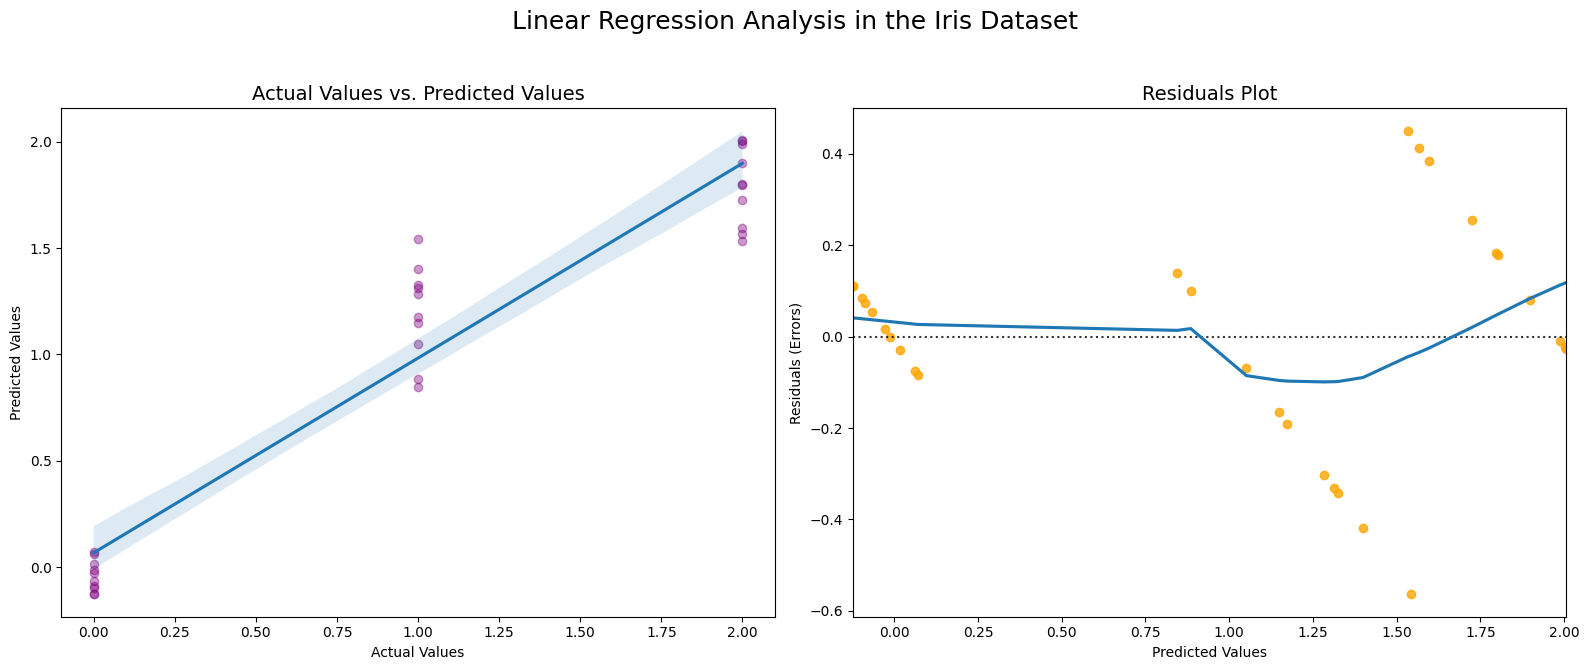


===== After classification in test 2 =====



Mean Absolute Error: 0.03333333333333333 

Mean Square Error: 0.03333333333333333 

Rsquared: 0.95


Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



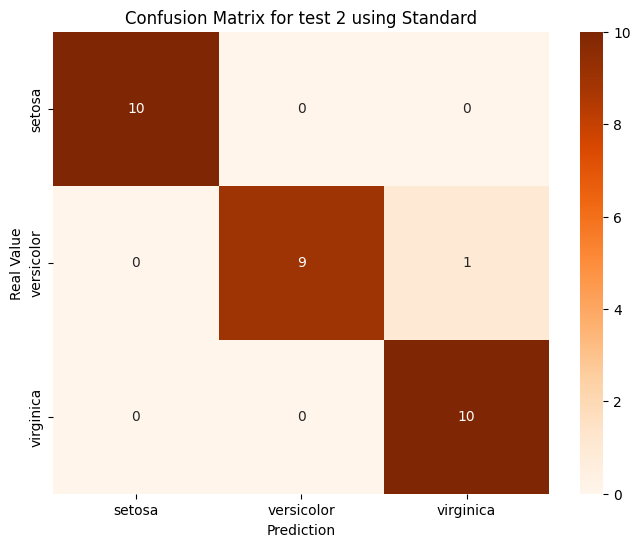

===== Before classification in test 2 =====



Mean Absolute Error: 0.17640823160531616 

Mean Square Error: 0.05423368261143133 

Rsquared: 0.918649476082853


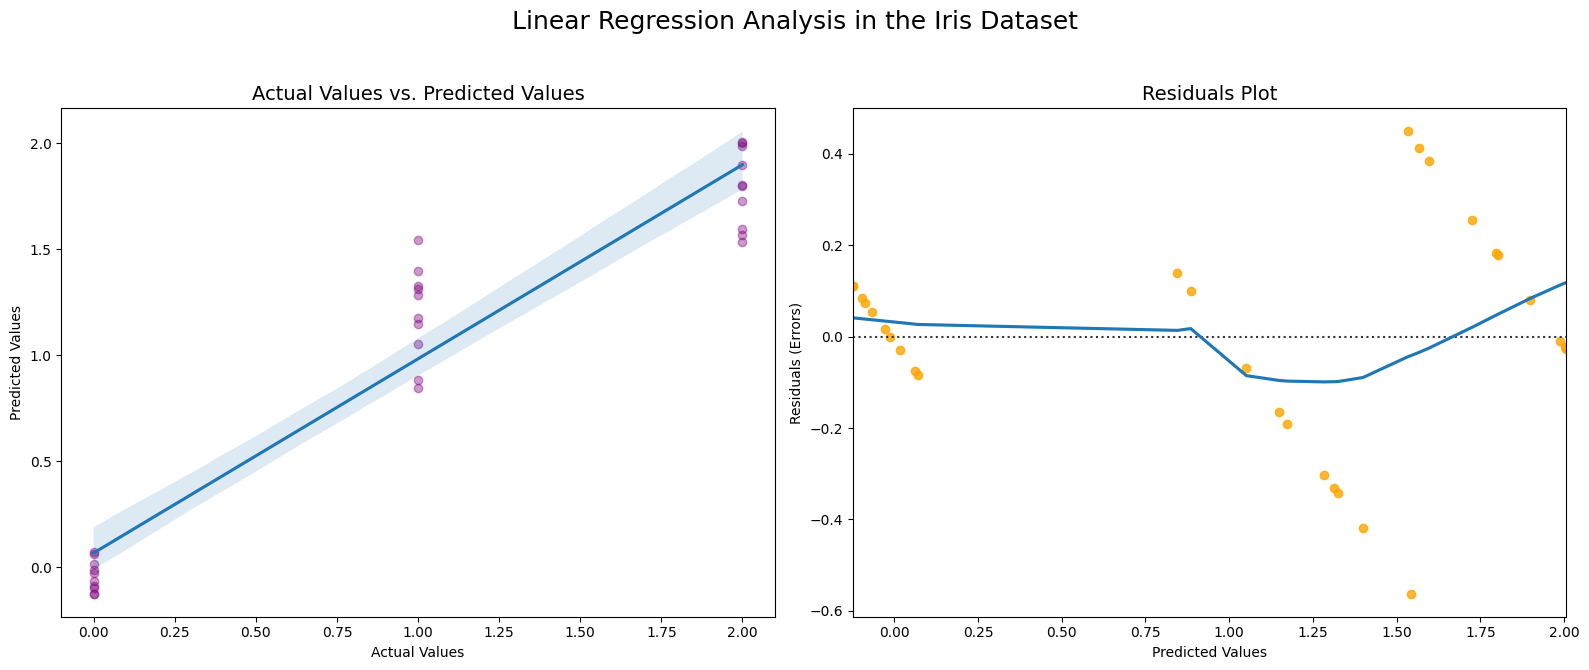


===== After classification in test 2 =====



Mean Absolute Error: 0.03333333333333333 

Mean Square Error: 0.03333333333333333 

Rsquared: 0.95


Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



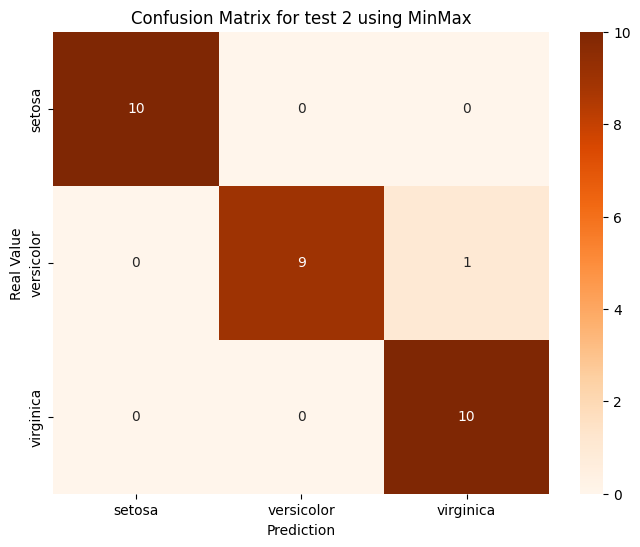

===== Before classification in test 3 =====



Mean Absolute Error: 0.17770146819531613 

Mean Square Error: 0.05358393666491076 

Rsquared: 0.9196240950026339


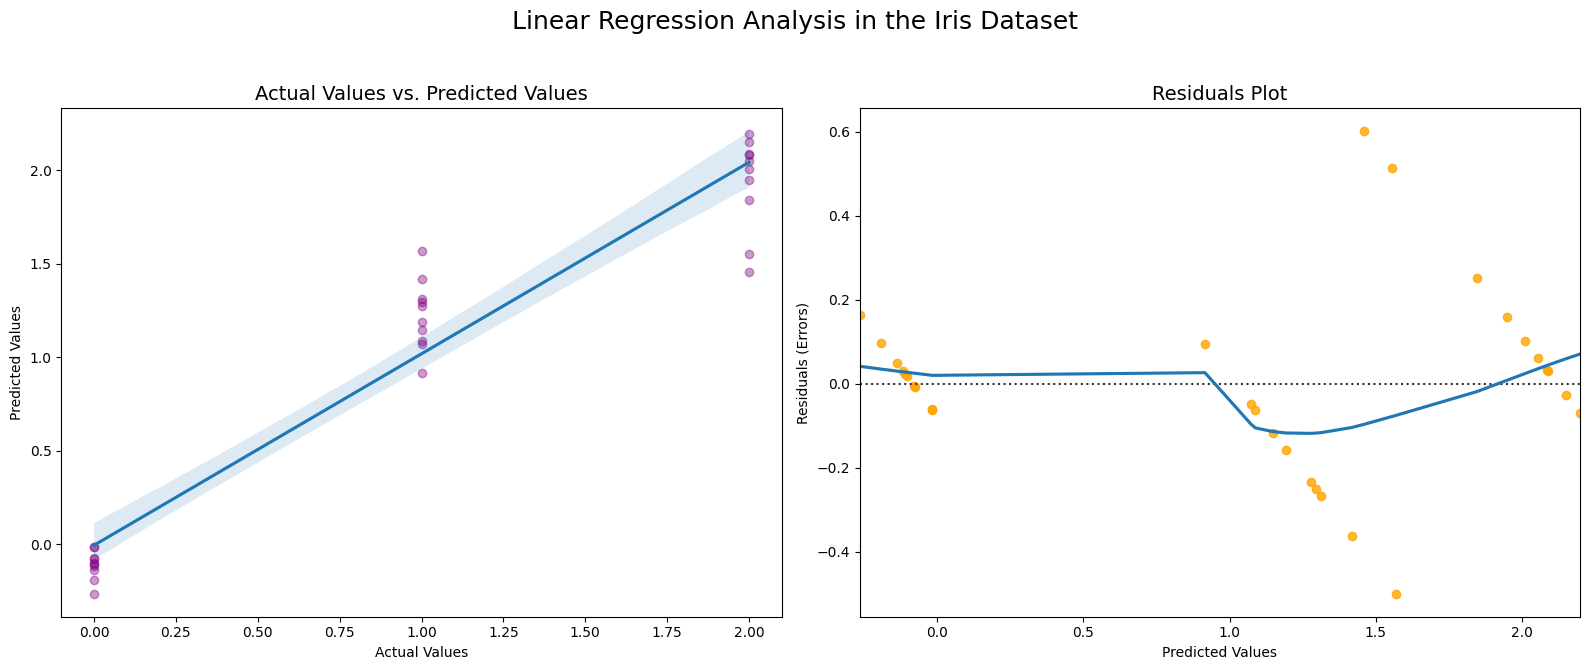


===== After classification in test 3 =====



Mean Absolute Error: 0.06666666666666667 

Mean Square Error: 0.06666666666666667 

Rsquared: 0.9


Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



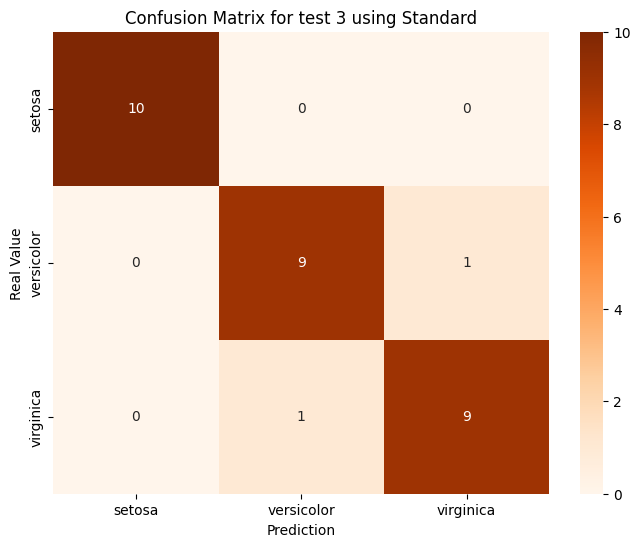

===== Before classification in test 3 =====



Mean Absolute Error: 0.1777014681953163 

Mean Square Error: 0.0535839366649108 

Rsquared: 0.9196240950026338


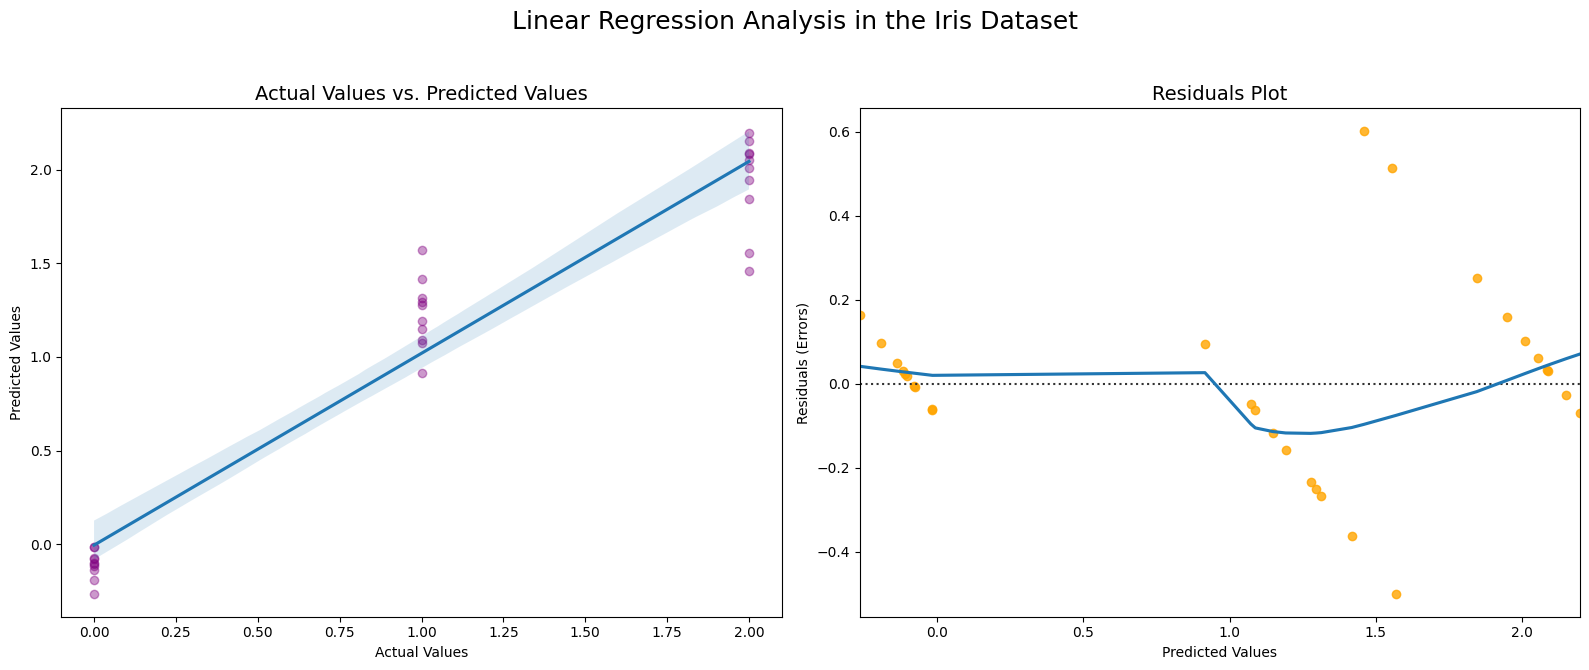


===== After classification in test 3 =====



Mean Absolute Error: 0.06666666666666667 

Mean Square Error: 0.06666666666666667 

Rsquared: 0.9


Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



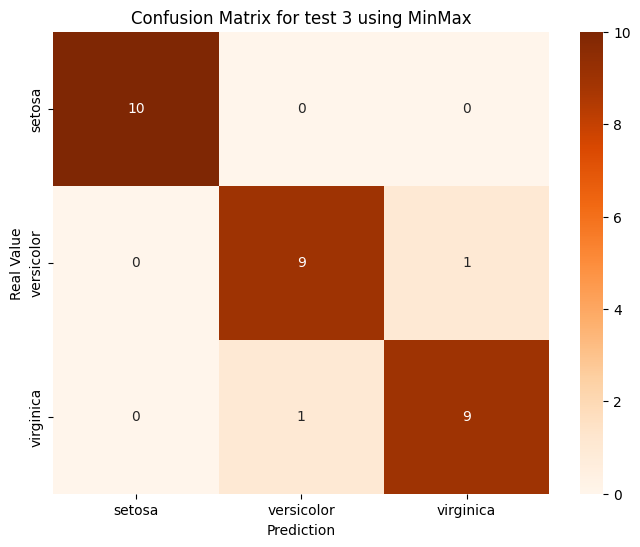

===== Before classification in test 4 =====



Mean Absolute Error: 0.15048090057998192 

Mean Square Error: 0.04121933526115031 

Rsquared: 0.9381709971082746


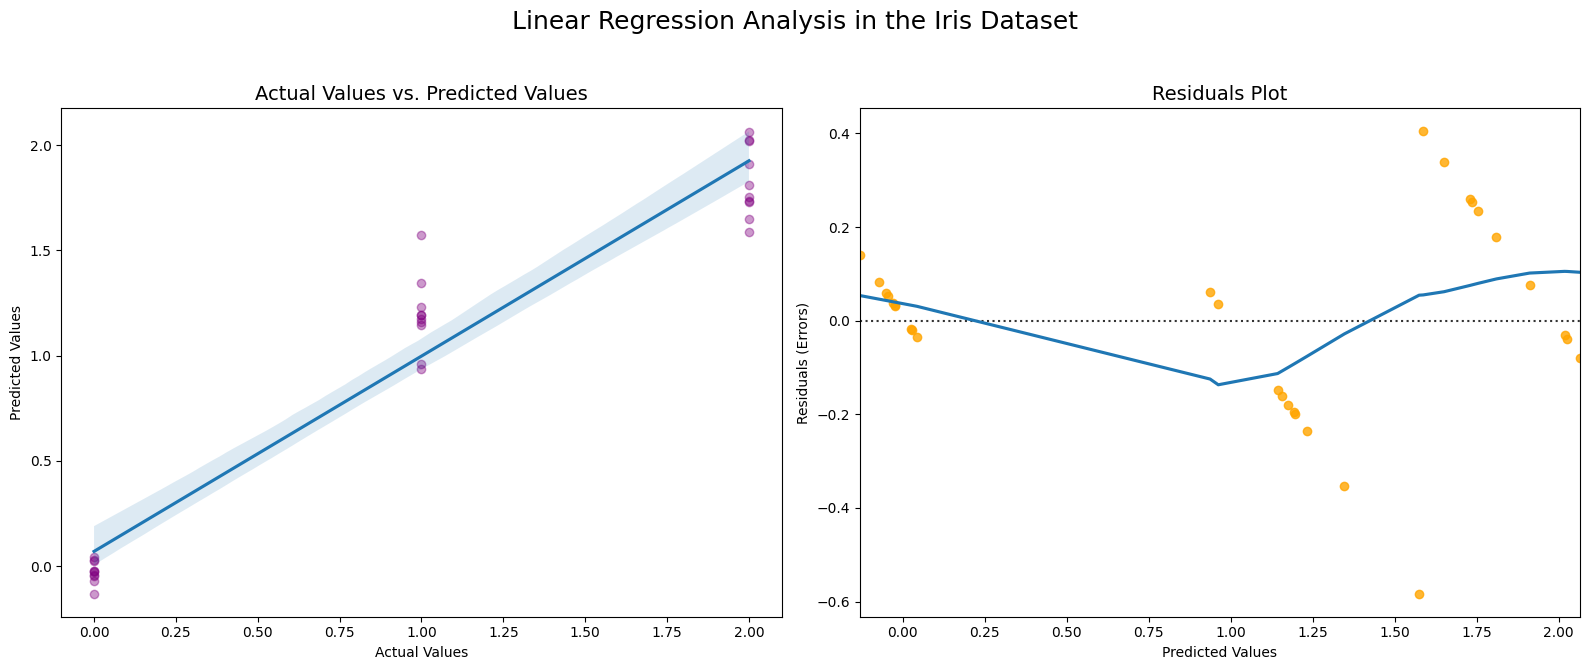


===== After classification in test 4 =====



Mean Absolute Error: 0.03333333333333333 

Mean Square Error: 0.03333333333333333 

Rsquared: 0.95


Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



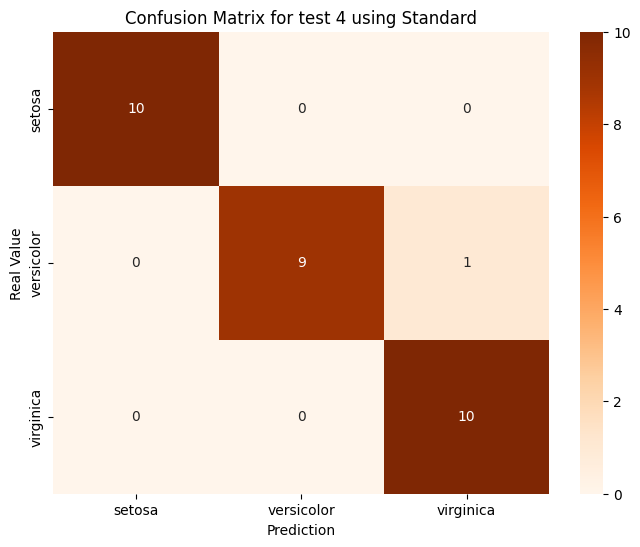

===== Before classification in test 4 =====



Mean Absolute Error: 0.15048090057998198 

Mean Square Error: 0.041219335261150354 

Rsquared: 0.9381709971082745


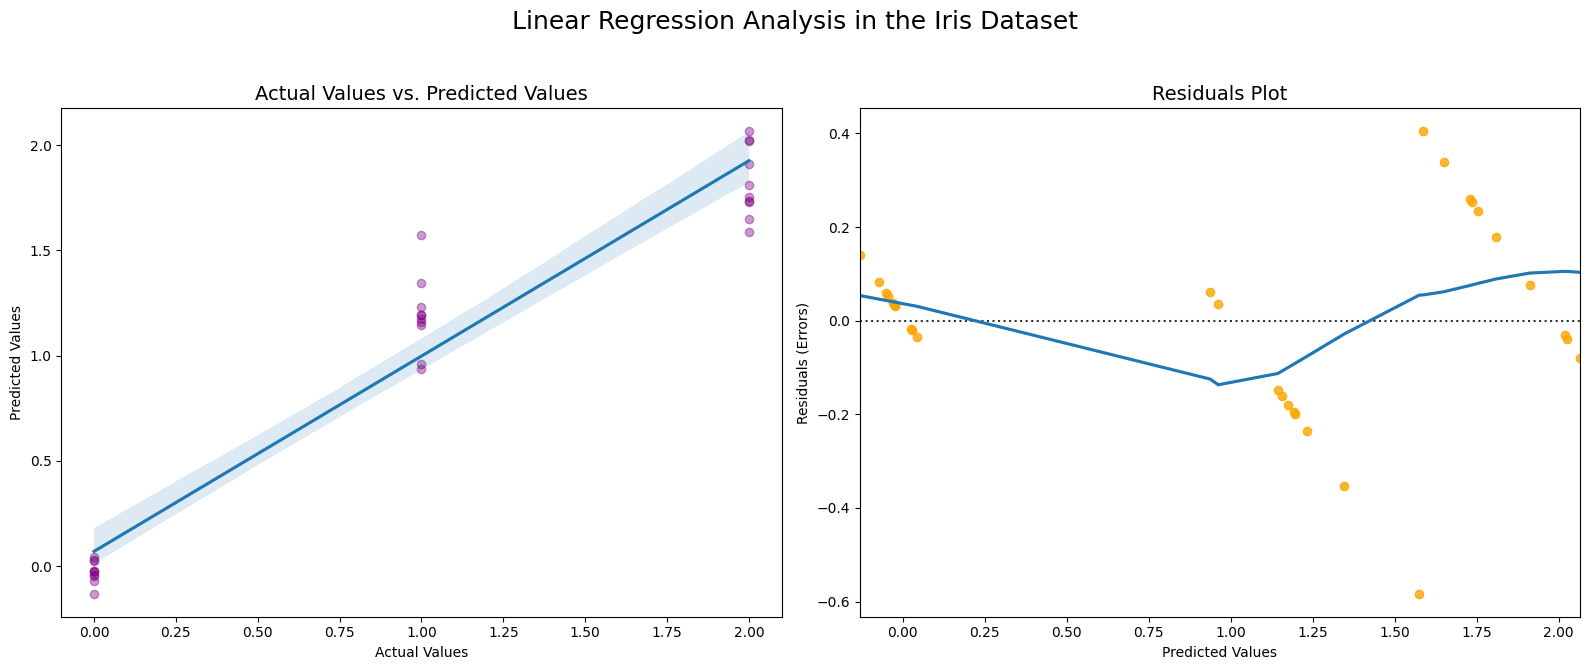


===== After classification in test 4 =====



Mean Absolute Error: 0.03333333333333333 

Mean Square Error: 0.03333333333333333 

Rsquared: 0.95


Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



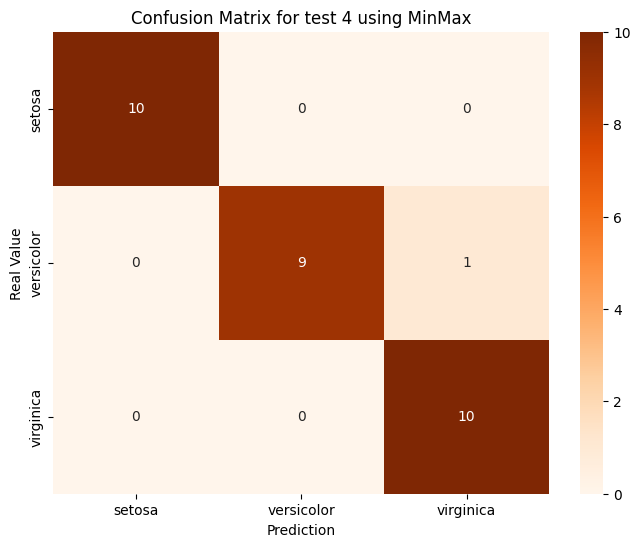

In [331]:
if __name__ == "__main__":
  main()